## UCI Adult Income Dataset - Exploratory and Descriptive Analysis

This notebook is focused on the exploratory and decriptive analysis of the cleaned version of   the UCI Adult income Dataset.

In [161]:
# import Libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px

## Define and create Paths

In [163]:
# Get working directory
current_dir=os.getcwd()

# Go one directory up to root directory
project_root_dir=os.path.dirname(current_dir)

# Define paths to the data folders
data_dir=os.path.join(project_root_dir,'data')
raw_dir=os.path.join(data_dir,'raw')
processed_dir=os.path.join(data_dir,'processed')

# Define paths to results folders
result_dir=os.path.join(project_root_dir,'results')

# Define paths to Docs folder
docs_dir=os.path.join(project_root_dir,'docs')

# Create a directories if they do not exists

os.makedirs(raw_dir,exist_ok=True)
os.makedirs(processed_dir,exist_ok=True)
os.makedirs(result_dir,exist_ok=True)
os.makedirs(docs_dir,exist_ok=True)

# Read data

In [165]:
adult_data_filename=os.path.join(processed_dir,"adult_cleaned.csv")
adult_df=pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,united-states,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,united-states,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,united-states,<=50k,highschoolgraduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,united-states,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,cuba,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,united-states,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,jamaica,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,united-states,>50k,highschoolgraduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,united-states,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,united-states,>50k,tertiary,white collar,north america,36-45


In [166]:
adult_df.shape

(32514, 17)

In [167]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32514 entries, 0 to 32513
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32514 non-null  int64 
 1   workclass           32514 non-null  object
 2   fnlwgt              32514 non-null  int64 
 3   education_num       32514 non-null  int64 
 4   marital_status      32514 non-null  object
 5   relationship        32514 non-null  object
 6   race                32514 non-null  object
 7   sex                 32514 non-null  object
 8   capital_gain        32514 non-null  int64 
 9   capital_loss        32514 non-null  int64 
 10  hours_per_week      32514 non-null  int64 
 11  native_country      32514 non-null  object
 12  income              32514 non-null  object
 13  education_level     32514 non-null  object
 14  occupation_grouped  32514 non-null  object
 15  native_region       32514 non-null  object
 16  age_group           32

## Summary Statistics
### Numerical Varible

In [169]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32514.000000,3.251400e+04,32514.000000,32514.000000,32514.000000,32514.000000
mean,38.589684,1.897916e+05,10.081626,1079.206619,87.430030,40.440026
std,13.639112,1.055782e+05,2.571975,7390.514416,403.237687,12.351147
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370492e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### categorical Variable

In [171]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,native_country,income,education_level,occupation_grouped,native_region,age_group
count,32514,32514,32514,32514,32514,32514,32514,32514,32514,32514,32514
unique,7,4,5,5,2,42,2,7,5,7,7
top,private,married,male spouse,white,male,united-states,<=50k,highschoolgraduate,white collar,north america,26-35
freq,22651,14984,13178,27772,21758,29131,24678,10484,16533,30019,8501


In [172]:
#if you want values
adult_df['workclass'].value_counts()

workclass
private          22651
self-employed     3656
government        2257
local-gov         2093
unknown           1836
voluntary           14
unemployed           7
Name: count, dtype: int64

In [173]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696654
self-employed    0.112444
government       0.069416
local-gov        0.064372
unknown          0.056468
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [185]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460848
single                   0.327705
divorced or separated    0.180907
widowed                  0.030541
Name: proportion, dtype: float64

In [187]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405302
single               0.360706
child                0.155595
female spouse        0.048225
extended relative    0.030172
Name: proportion, dtype: float64

In [189]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854155
black                        0.096020
asian or pacific islander    0.031925
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

In [191]:
adult_df['sex'].value_counts(normalize=True)

sex
male      0.669189
female    0.330811
Name: proportion, dtype: float64

In [193]:
adult_df['income'].value_counts(normalize=True)

income
<=50k    0.758996
>50k     0.241004
Name: proportion, dtype: float64

In [195]:
adult_df['education_level'].value_counts(normalize=True)

education_level
highschoolgraduate    0.322446
tertiary              0.247801
samecollege           0.223811
secondary             0.093929
associate             0.075321
primary               0.035154
preschool             0.001538
Name: proportion, dtype: float64

In [197]:
adult_df['occupation_grouped'].value_counts(normalize=True)

occupation_grouped
white collar    0.508489
blue collar     0.308852
service         0.125700
unknown         0.056683
miritary        0.000277
Name: proportion, dtype: float64

In [199]:
adult_df['native_region'].value_counts(normalize=True)

native_region
north america      0.923264
asia               0.020637
other              0.017869
central america    0.016116
europe             0.016024
south america      0.005229
south ameriaca     0.000861
Name: proportion, dtype: float64

In [201]:
adult_df['age_group'].value_counts(normalize=True)

age_group
26-35    0.261457
36-45    0.246079
46-60    0.224150
18-25    0.167559
61-75    0.064311
<18      0.029064
76+      0.007381
Name: proportion, dtype: float64

## Income Distribution

In [203]:
adult_df_income=adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24678
1,>50k,7836


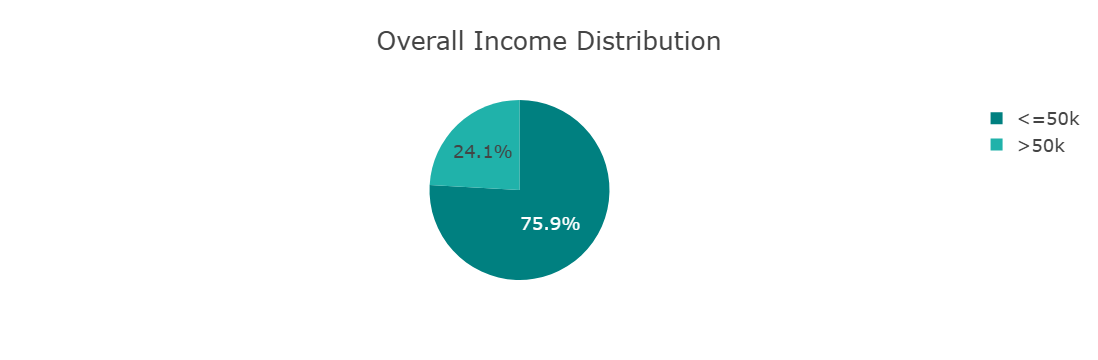

In [205]:
fig=px.pie(
    adult_df_income,names='income',values='total',
    title='Overall Income Distribution',
    color_discrete_sequence=["teal","LightSeaGreen"],
)
fig.update_layout(template="presentation", paper_bgcolor="rgba(0,0,0,0)",plot_bgcolor=("rgba(0,0,0,0)"))
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(result_dir,'income_distribution_pie_chart.html'))

In [209]:
adult_df_income_age=adult_df.groupby(['age_group','income']).size().reset_index(name='total_by_age')
adult_df_income_age


,age_group,income,total_by_age
0,18-25,<=50k,5334
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [211]:
total_per_group=adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage']=(adult_df_income_age['total_by_age']/total_per_group)*100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5334,97.907489
1,18-25,>50k,114,2.092511
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


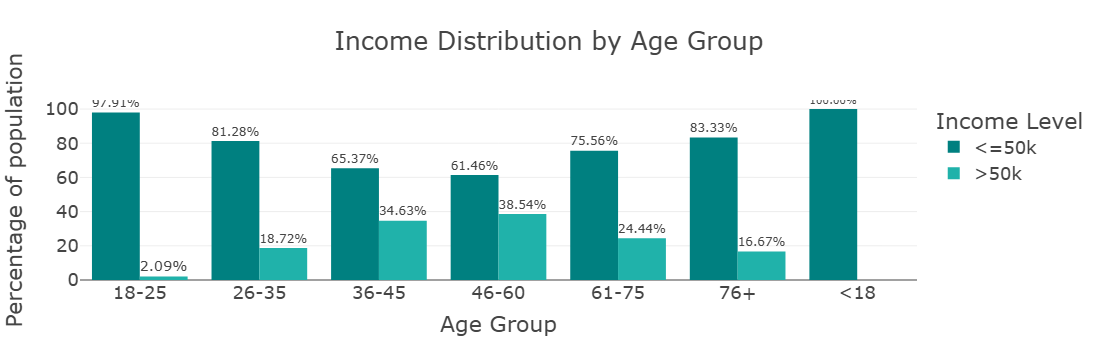

In [213]:
fig=px.bar(adult_df_income_age,
           x='age_group',
           y='percentage',
           color='income',
           title='Income Distribution by Age Group',
           color_discrete_sequence=["teal","LightSeaGreen"],
           barmode='group',
           text='percentage'
           
              
)
fig.update_layout(template="presentation",
                 xaxis_title='Age Group',
                  yaxis_title='Percentage of population',
                  legend_title=dict(text='Income Level'),
                 paper_bgcolor="rgba(0,0,0,0)",plot_bgcolor=("rgba(0,0,0,0)"))
fig.update_traces(texttemplate='%{text:.2f}%',textposition='outside') 
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution-AgeGroup-bar_chart.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution-AgeGroup_bar_chart.png'))
fig.write_html(os.path.join(result_dir,'income_distribution-AgeGroup_bar_chart.html'))

In [214]:
# List of all built-in Plotly templates
themes = [
    "plotly",          # Default Plotly theme
    "plotly_white",    # White background
    "plotly_dark",     # Dark mode
    "ggplot2",         # ggplot2-style
    "seaborn",         # Seaborn-style
    "simple_white",    # Very minimal white theme
    "presentation",    # Optimized for presentations
    "xgridoff",        # Grid off on x-axis
    "ygridoff",        # Grid off on y-axis
    "gridon",          # Grid on
    "none"             # No template at all
]


In [ ]:
#pip install -U kaleido

In [ ]:
#pip install -U plotly

In [217]:
adult_df_income_reg=adult_df.groupby(['native_region','income']).size().reset_index(name='total_by_region')
adult_df_income_reg

,native_region,income,total_by_region
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22769
7,north america,>50k,7250
8,other,<=50k,435
9,other,>50k,146


In [219]:
total_per_native_region=adult_df_income_reg.groupby('native_region')['total_by_region'].transform('sum')
adult_df_income_reg['percentage']=(adult_df_income_reg['total_by_region']/total_per_native_region)*100
adult_df_income_reg

,native_region,income,total_by_region,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22769,75.848629
7,north america,>50k,7250,24.151371
8,other,<=50k,435,74.870912
9,other,>50k,146,25.129088


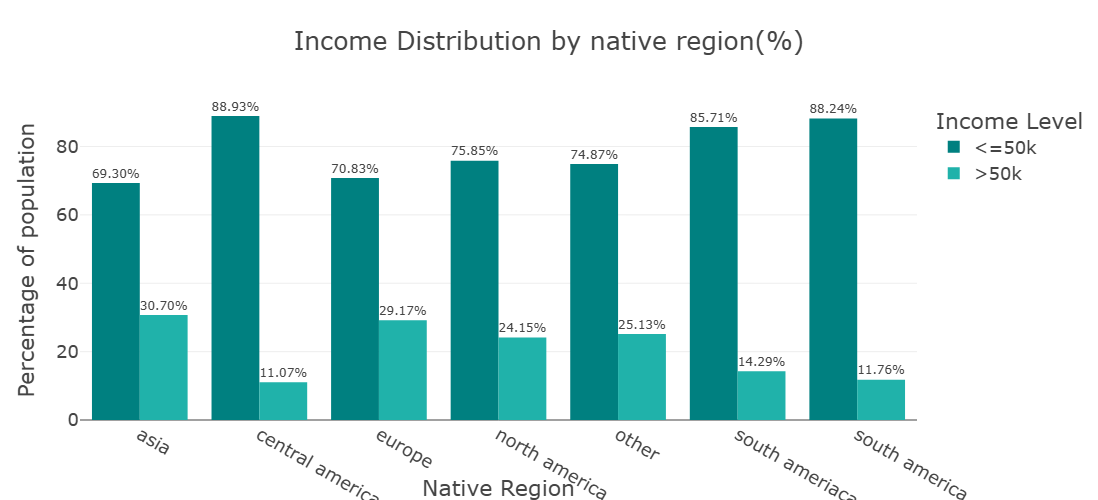

In [225]:
fig=px.bar(adult_df_income_reg,
           x='native_region',
           y='percentage',
           color='income',
           title='Income Distribution by native region(%)',
           color_discrete_sequence=["teal","LightSeaGreen"],
           barmode='group',
           text='percentage',
           width=1000,
           height=500
           
           
              
)
fig.update_layout(template="presentation",
                 xaxis_title='Native Region',
                  yaxis_title='Percentage of population',
                  legend_title=dict(text='Income Level'),
                 paper_bgcolor="rgba(0,0,0,0)",plot_bgcolor=("rgba(0,0,0,0)")
                 )
fig.update_traces(texttemplate='%{text:.2f}%',textposition='outside') 
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution_byNativeRegion_bar_chart.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution_byNativeRegion_bar_chart.png'))
fig.write_html(os.path.join(result_dir,'income_distribution_byNativeRegion_bar_chart.html'))

In [222]:
adult_df_income_race=adult_df.groupby(['race','income']).size().reset_index(name='total_by_race')
adult_df_income_race

,race,income,total_by_race
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20660
9,white,>50k,7112


In [227]:
total_per_race=adult_df_income_race.groupby('race')['total_by_race'].transform('sum')
adult_df_income_race['percentage']=(adult_df_income_race['total_by_race']/total_per_race)*100
adult_df_income_race

,race,income,total_by_race,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20660,74.391473
9,white,>50k,7112,25.608527


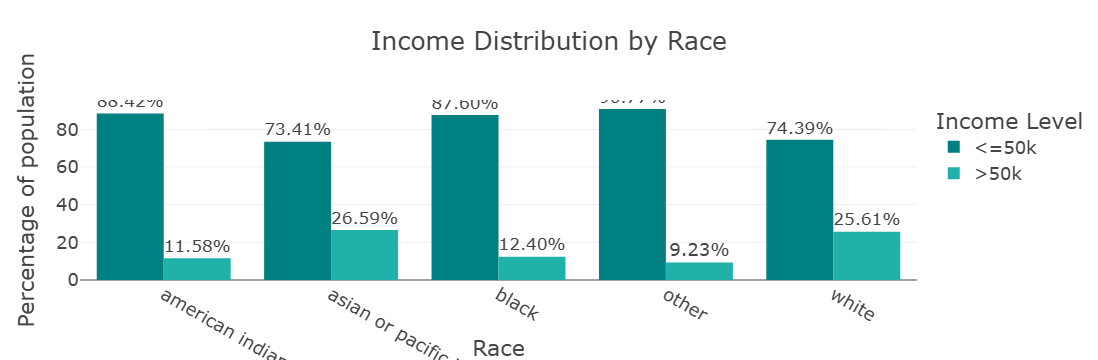

In [ ]:
fig=px.bar(adult_df_income_race,
           x='race',
           y='percentage',
           color='income',
           title='Income Distribution by Race',
           color_discrete_sequence=["teal","LightSeaGreen"],
           barmode='group',
           text='percentage'
           
              
)
fig.update_layout(template="presentation",
                 xaxis_title='Race',
                  yaxis_title='Percentage of population',
                  legend_title=dict(text='Income Level'),
                 paper_bgcolor="rgba(0,0,0,0)",plot_bgcolor=("rgba(0,0,0,0)"))
fig.update_traces(texttemplate='%{text:.2f}%',textposition='outside')
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution-Race-bar_chart.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution-Race_bar_chart.png'))
fig.write_html(os.path.join(result_dir,'income_distribution-Race_bar_chart.html'))

In [ ]:
adult_df_income_edu_occ = (
    adult_df.groupby(['education_level', 'occupation_grouped', 'income'])
            .size()
            .reset_index(name='total')
            .sort_values('total', ascending=False)
)

adult_df_income_edu_occ


In [ ]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education_level'] + " | " + adult_df_income_edu_occ['occupation_grouped']) 
adult_df_income_edu_occ

In [ ]:
num=15
adult_df_combos = adult_df_income_edu_occ.head(num)
fig = px.bar(
    adult_df_combos,
    x = 'total',
    y = 'edu_occ',
    color = 'income',
    orientation = 'h',
    title = f'Top{num} Education and Occupation Groups Combinations by Income Group',
    # barmode = 'group',
    height = 500,
    width=1100,
   color_discrete_sequence=["teal","LightSeaGreen"],
    text = 'total'
)

fig.update_layout(template="presentation", xaxis_title='Number of Individuals',
                  yaxis_title='Education | Occupation Group',
                  legend_title=dict(text='Income Level'),
                margin=dict(l=450, r=50, t= 50, b=50))

fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution-EduOccupa-bar_chart.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution-EduOccupa_bar_chart.png'))
fig.write_html(os.path.join(result_dir,'income_distribution-EduOccupa_bar_chart.html'))